In [1]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
experiment_dir = 'C:/Users/minsu/Desktop/Work/current/mlpractical/VGG_08_experiment'

In [2]:
def haha(a, b):
    if (b == 0):
        return 1
    temp = haha(a, int(b/2))
    if (b%2 != 0):
        return temp * temp * a
    else:
        return temp * temp
haha(3,5)

243

In [3]:
def collect_experiment_dicts(target_dir, test_flag=False):
    experiment_dicts = dict()
    for subdir, dir, files in os.walk(target_dir):
        for file in files:
            filepath = None
            if not test_flag:
                if file == 'summary.csv':
                    filepath = os.path.join(subdir, file)
            
            elif test_flag:
                if file == 'test_summary.csv':
                    filepath = os.path.join(subdir, file)
            
            if filepath is not None:
                
                with open(filepath, 'r') as read_file:
                    lines = read_file.readlines()
                    
                current_experiment_dict = {key: [] for key in lines[0].replace('\n', '').split(',')}
                idx_to_key = {idx: key for idx, key in enumerate(lines[0].replace('\n', '').split(','))}
                
                for line in lines[1:]:
                    for idx, value in enumerate(line.replace('\n', '').split(',')):
                        if value == "":
                            continue
                        current_experiment_dict[idx_to_key[idx]].append(float(value))
                
                experiment_dicts[subdir.split('/')[-2]] = current_experiment_dict
                
    return experiment_dicts
                
            

In [4]:
result_dict1 = collect_experiment_dicts('C:/Users/minsu/Desktop/Work/current/mlpractical/VGG_08/result_outputs')
result_dict2 = collect_experiment_dicts('C:/Users/minsu/Desktop/Work/current/mlpractical/VGG_38/result_outputs')
result_dict = dict(result_dict1)
result_dict.update(result_dict2)
for key, value in result_dict.items():
    print(key, list(value.keys()))

VGG_08 ['train_acc', 'train_loss', 'val_acc', 'val_loss']
VGG_38 ['train_acc', 'train_loss', 'val_acc', 'val_loss']


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def plot_result_graphs(plot_name, stats, keys_to_plot, notebook=True):
    
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for name in keys_to_plot:
        for k in ['train_loss', 'val_loss']:
            item = stats[name][k]
            ax_1.plot(np.arange(0, len(item)), 
                      item, label='{}_{}'.format(name, k))
            
    ax_1.legend(loc=0)
    ax_1.set_ylabel('Loss')
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for name in keys_to_plot:
        for k in ['train_acc', 'val_acc']:
            item = stats[name][k]
            ax_2.plot(np.arange(0, len(item)), 
                      item, label='{}_{}'.format(name, k))
            
    ax_2.legend(loc=0)
    ax_2.set_ylabel('Accuracy')
    ax_2.set_xlabel('Epoch number')
    
    fig_1.savefig('../data/{}_loss_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
    
    fig_2.savefig('../data/{}_accuracy_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
    
    

C:\Users\minsu\AppData\Local\Temp\ipykernel_42968\665802210.py:32: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error in 3.6
  fig_1.savefig('../data/{}_loss_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
C:\Users\minsu\AppData\Local\Temp\ipykernel_42968\665802210.py:32: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error in 3.6
  fig_1.savefig('../data/{}_loss_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
C:\Users\minsu\AppData\Local\Temp\ipykernel_42968\665802210.py:37: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error in 3.6
  fig_2.savefig('../data/{}_accuracy_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
C:\Us

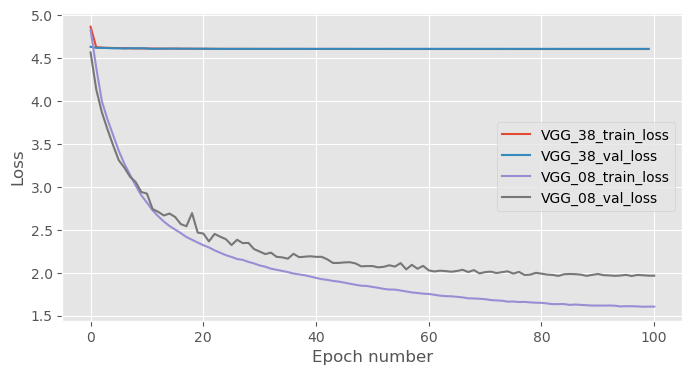

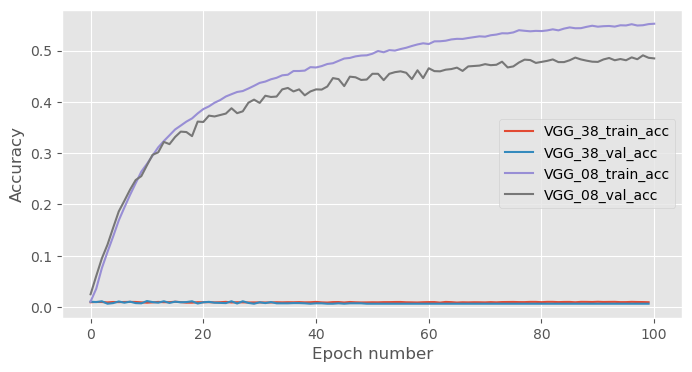

In [6]:
plot_result_graphs('problem_model', result_dict, keys_to_plot=['VGG_38', 'VGG_08'])

In [12]:
!python C:/Users/minsu/Desktop/Work/current/mlpractical/pytorch_mlp_framework/train_evaluate_image_classification_system.py --batch_size 100 --seed 0 --num_filters 32 --num_stages 3 --num_blocks_per_stage 5 --experiment_name VGG_38_experiment --use_gpu False --num_classes 100 --block_type conv_block --continue_from_epoch -1 --num_epochs 1


Namespace(batch_size=100, continue_from_epoch=-1, seed=0, image_num_channels=3, image_height=32, image_width=32, num_stages=3, num_blocks_per_stage=5, num_filters=32, num_epochs=1, num_classes=100, experiment_name='VGG_38_experiment', use_gpu=False, weight_decay_coefficient=0, block_type='conv_block')
Files already downloaded and verified
train (47500, 32, 32, 3)
train (47500,)
Files already downloaded and verified
val (2500, 32, 32, 3)
val (2500,)
Files already downloaded and verified
test (10000, 32, 32, 3)
test (10000,)
Building basic block of ConvolutionalNetwork using input shape (100, 3, 32, 32)
torch.Size([100, 32, 32, 32])
torch.Size([100, 32, 32, 32])
torch.Size([100, 32, 32, 32])
torch.Size([100, 32, 32, 32])
torch.Size([100, 32, 32, 32])
torch.Size([100, 32, 32, 32])
torch.Size([100, 32, 16, 16])
torch.Size([100, 32, 16, 16])
torch.Size([100, 32, 16, 16])
torch.Size([100, 32, 16, 16])
torch.Size([100, 32, 16, 16])
torch.Size([100, 32, 16, 16])
torch.Size([100, 32, 8, 8])
tor


  0%|          | 0/475 [00:00<?, ?it/s]C:\Users\minsu\anaconda3\envs\mlp\lib\site-packages\torch\optim\lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
C:\Users\minsu\anaconda3\envs\mlp\lib\site-packages\torch\optim\lr_scheduler.py:163: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an i

Namespace(batch_size=100, continue_from_epoch=-1, seed=0, image_num_channels=3, image_height=32, image_width=32, num_stages=3, num_blocks_per_stage=5, num_filters=32, num_epochs=10, num_classes=100, experiment_name='VGG_38_experiment', use_gpu=False, weight_decay_coefficient=0, block_type='conv_block')
Files already downloaded and verified
train (47500, 32, 32, 3)
train (47500,)
Files already downloaded and verified
val (2500, 32, 32, 3)
val (2500,)
Files already downloaded and verified
test (10000, 32, 32, 3)
test (10000,)
Building basic block of ConvolutionalNetwork using input shape (100, 3, 32, 32)
torch.Size([100, 32, 32, 32])
torch.Size([100, 32, 32, 32])
torch.Size([100, 32, 32, 32])
torch.Size([100, 32, 32, 32])
torch.Size([100, 32, 32, 32])
torch.Size([100, 32, 32, 32])
torch.Size([100, 32, 16, 16])
torch.Size([100, 32, 16, 16])
torch.Size([100, 32, 16, 16])
torch.Size([100, 32, 16, 16])
torch.Size([100, 32, 16, 16])
torch.Size([100, 32, 16, 16])
torch.Size([100, 32, 8, 8])
to


  0%|          | 0/475 [00:00<?, ?it/s]C:\Users\minsu\anaconda3\envs\mlp\lib\site-packages\torch\optim\lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
C:\Users\minsu\anaconda3\envs\mlp\lib\site-packages\torch\optim\lr_scheduler.py:163: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an i


  0%|          | 0/475 [00:00<?, ?it/s]C:\Users\minsu\anaconda3\envs\mlp\lib\site-packages\torch\optim\lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
C:\Users\minsu\anaconda3\envs\mlp\lib\site-packages\torch\optim\lr_scheduler.py:163: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an i

Namespace(batch_size=100, continue_from_epoch=-1, seed=0, image_num_channels=3, image_height=32, image_width=32, num_stages=3, num_blocks_per_stage=5, num_filters=32, num_epochs=10, num_classes=100, experiment_name='VGG_38_experiment', use_gpu=False, weight_decay_coefficient=0, block_type='conv_block')
Files already downloaded and verified
train (47500, 32, 32, 3)
train (47500,)
Files already downloaded and verified
val (2500, 32, 32, 3)
val (2500,)
Files already downloaded and verified
test (10000, 32, 32, 3)
test (10000,)
Building basic block of ConvolutionalNetwork using input shape (100, 3, 32, 32)
torch.Size([100, 32, 32, 32])
torch.Size([100, 32, 32, 32])
torch.Size([100, 32, 32, 32])
torch.Size([100, 32, 32, 32])
torch.Size([100, 32, 32, 32])
torch.Size([100, 32, 32, 32])
torch.Size([100, 32, 16, 16])
torch.Size([100, 32, 16, 16])
torch.Size([100, 32, 16, 16])
torch.Size([100, 32, 16, 16])
torch.Size([100, 32, 16, 16])
torch.Size([100, 32, 16, 16])
torch.Size([100, 32, 8, 8])
to